# Unidad 01: Radiación de Cuerpo Negro 

- **Nombre:** Jesús Capistrán Martínez  
- **email:**  capistran@gmail.com  
- **Matricula:** 123456789


<a target="_blank" href="https://colab.research.google.com/github/jesuscapistran/fisica_electronica_2023/blob/main/01_Unidad/notebooks/02-Ley_Raleigh-Jeans.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Teoría Cuantica  Max Planck

En el año 1900, Max Planck desarrolló una teoría para la radiación de un cuerpo negro que conduce a una ecuación para $I(\lambda, T)$ que está en total acuerdo con los resultados experimentales a todas las longitudes de onda.


$$  I(\lambda, T)  =  \frac{2\pi hc^2}{\lambda^5(\exp(\frac{hc}{\lambda k_B T}) - 1)}$$

Donde: 
- $h = 6.626\times10^{-34} [J·s]$ 
- $k_B = 1.38\times10^{-23} [J/K]$ 
- $ c = 2.99\times10^8  [m/s]$ 
- $ T [K] $ 
- $\lambda [m]$ 

### Comportamiento 

- La energía de un oscilador sólo puede tener ciertos valores discretos $En = nhf$, donde n es un entero positivo conocido como número cuántico, $f$ es la frecuencia de la oscilación y $h$ es un parámetro introducido por Planck y que hoy se conoce como la constante de Planck. 

- Ya que la energía de cada oscilador sólo puede tener valores discretos conocidos, se dice que la energía está cuantizada. Cada uno de los valores discretos de energía corresponde a un estado cuántico diferente, representado por el número cuántico $n$. 

- Cuando el oscilador se encuentra en el estado cuántico $n = 1$, su energía es igual a $hf$; cuando se encuentra en el estado cuántico $n = 2$, la energía es igual a $2hf$, y así sucesivamente.

In [2]:
# Importar librerias (se usaran más adelante en el curso)

import numpy as np  #Esta libreria hace calculo de matrices 
import matplotlib.pyplot as plt  # Esta liberaria nos permite graficar 


In [20]:
# Declarar constantes 

kB       = 1.38e-23  # [J/K] Constante de Boltzman 
c        = 2.99e8    # [m/s] Velocidad de la luz en el vacío
T        = 6000      # [K]   Temperatura de la superficie
h        = 6.625e-34 # [J·s] Constante de Planck
q        = 1.602e-19 # [J/eV] 1 joule = 1.602e-19 eV 

stefan     = 5.670e-8   # [W/(m^2 K)] Constante de Stefan Boltzman
r_sol      = 6.96e8     # [m]  Radio del sol 
emisividad = 0.965      # Emisividad del sol (aproximación)
area_sol   = 4*np.pi*r_sol**2


In [21]:
# Variable independite (Temperatura): P(T)
#URL: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

x = np.arange(0.01,3.01,0.01) # [µm] np.arange(inicio,final,espacio)
Longitud_Onda = x*1e-6     # [m] Longitud de onda en metros


## Programar la ecuación 

$$  I(\lambda, T)  =  \frac{2\pi hc^2}{\lambda^5}·\frac{1}{\exp(\frac{hc}{\lambda k_B T}) - 1}$$


Donde: 
- $\frac{h c}{\lambda}$ = [J] Energía luz
- $k_BT$  = [J] Energía termica

In [23]:
# Programar la ecuación (Varieble dependiente)

T1 = 6000

energia_luz = h*c/Longitud_Onda
energia_termica = kB*T1
probabilidad = np.exp(energia_luz/energia_termica)-1

Planck_6000  = (2*np.pi*h*c**2)/((Longitud_Onda**5)*probabilidad)
Raleigh_6000 = (2*np.pi*c*kB*6000)/(Longitud_Onda**4)
Wien_6000    = 2.898e-3/T1
Stefan_6000  = (stefan*area_sol*emisividad*T**4)/(4*np.pi*(1.49e11)**2)

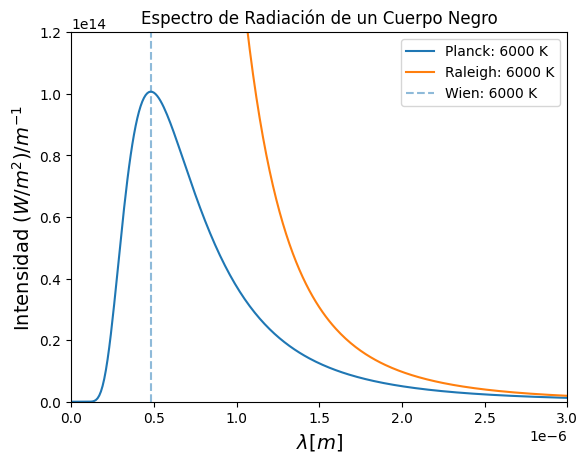

In [25]:
# Graficar Intensidad(Longitud_Onda , T)
# URL: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html

plt.figure()
plt.title('Espectro de Radiación de un Cuerpo Negro')

# Graficar curvas
plt.plot(Longitud_Onda, Planck_6000, label = 'Planck: 6000 K')
plt.plot(Longitud_Onda, Raleigh_6000, label = 'Raleigh: 6000 K')
plt.vlines(Wien_6000,0,1.5e14, linestyle ='--', alpha = 0.5, label = 'Wien: 6000 K')

# Muestra las legendas
plt.legend()

# Nombre de los ejes
plt.xlabel('$\lambda [m]$', fontsize=14)
plt.ylabel('Intensidad $ (W/m^2)/m^{-1}$', fontsize=14)


# Define los limites de las graficas
plt.ylim(0,1.2e14)
plt.xlim(0,3e-6)

plt.show()